# KMeans

***

O KMeans é um algoritmo conceitualmente diferente dos que já trabalhamos aqui. Diferentemente dos classificadores, que pertencem à classe de modelos supervisionados, o KMeans pertence à classe de modelos não supervisionados. Modelos não supervisionados não requer a utilização de classes, ou um alvo específico para aprender padrões. A partir das próprias features no dataset, eles aprendem esses padrões.

Como assim?

## Índice

1. [Importando bibliotecas](#importando-bibliotecas)
2. [Como o KMeans aprende?](#Como-o-kmeans-aprende?)
3. [Limitações](#limitações)

## Importando bibliotecas

In [42]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.cluster import KMeans

# Funções de avaliação dos modelos
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

# Função para carregar nosso dataset
from sklearn.datasets import load_wine

def show_decision_region(x, y, clf, f0, f1, centroids=None):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    if clf.__class__.__name__ == "KNeighborsClassifier":
        plt.title(clf.__class__.__name__ + " k = " + str(clf.n_neighbors))
    else:
        plt.title(clf.__class__.__name__)

    if centroids is not None:
        plt.scatter(
            centroids[:, 0],
            centroids[:, 1], 
            c="tab:red", 
            marker="*",
            s=300,
            alpha=1
        )
    plt.show()


## Como o KMeans aprende?

O KMeans requer que você informe a quantidade de centróides em que os dados devem ser agrupados. Cada centróides representa o ponto de referência para um cluster. Inicialmente, um centróides pode ser escolhido como uma instância aleatória do dataset, que será atualizado até a variação do ponto durante sua atualização se tornar baixa o suficiente. Após os clusters atingirem convergência, o algoritmo termina sua execução.

Para atualizar um cluster, o algoritmo é dividido em dois passos:

- Atribuição: Cada ponto do dataset é atribuído a um cluster, os pontos mais próximos de um centróides, farão parte daquele cluster.
- Atualização: Após o passo de atribuição, cada cluster será atualizado pela média dos seus pontos.

O algoritmo se repete até que os centróides sejam marginalmente atualizados (convergência).

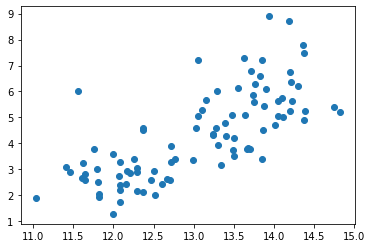

In [5]:
# carregando o dataset
X, y = load_wine(return_X_y=True, as_frame=True)

# vamos escolher apenas classes do dataset
class_a = 0
class_b = 1
class_0_instances = (y == class_a)
class_1_instances = (y == class_b)

filtered_y = y[class_0_instances | class_1_instances]
filtered_X = X[class_0_instances | class_1_instances]

# vamos observar as duas features
feature_0 = "alcohol"
feature_1 = "color_intensity"

# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(filtered_X[[feature_0, feature_1]], filtered_y, test_size=0.3, random_state=199)

plt.scatter(
    X_train[feature_0],
    X_train[feature_1], 
)


Quantos clusters podemos observar nesse dataset?

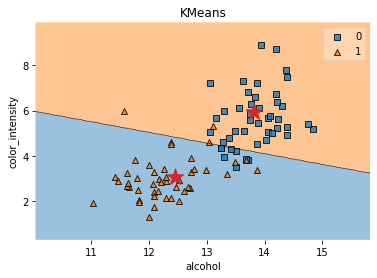

In [44]:
model = KMeans(n_clusters=2, random_state=199)
model.fit(X_train, y_train)
labels = model.predict(X_train)

colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

show_decision_region(
    np.array(
        [
            X_train[feature_0].values, 
            X_train[feature_1].values,
        ]
    ).T, 
    y_train.values, 
    model, 
    feature_0, 
    feature_1,
    model.cluster_centers_
)

Note que a custerização cria uma região linear! Apesar de usar um algoritmo similar ao kNN, a região de clusters é linear.

## Limitações

No exeomplo anterior, observamos que a região criada pelo KMeans é linear. Isso é referente ao KMeans ou ao dataset? Vamos avaliar outro dataset.

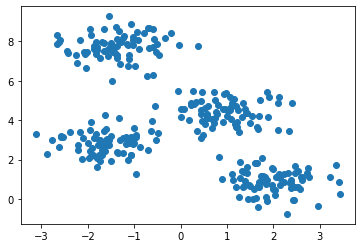

In [113]:
from sklearn.datasets import make_moons, make_circles, make_blobs

# criação do dataset
X, y = make_blobs(300, 2, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1])


A implementação do _sklearn_ do KMeans possui várias otimizações sobre o algoritmo original. Primeiramente, a escolha inicial dos centróides não é feita de forma puramente aleatória, utiliza o algoritmo k-means++: ao invés de escolher de forma aleatória os centróides inciais, o algoritmo realiza k iterações, onde a probabilidade de escolher um ponto respeita uma função de distribuição não-linear. A cada vez que uma instãncia é escolhida, a probabilidade de escolher uma nova instância próxima às anteriores é menor.

Além disso, o algoritmo é executado várias vezes (10 por padrão), e o resultado com melhor clusterização é utilizado.

Como o algoritmo se comporta caso removessemos essas otimizações?

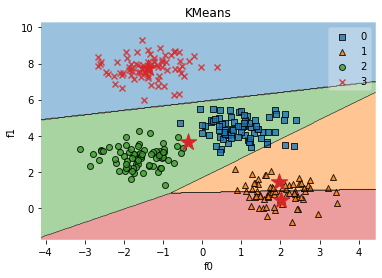

In [114]:
# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

model = KMeans(n_clusters=4, init="random", n_init=1, random_state=0)
model.fit(X)

show_decision_region(
    X,
    y,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

Existe um claro problema, duas massas de dados diferentes estão sendo atribuídas à apenas um cluster, enquanto que uma massa possui dois centróides.

Agora vamos avaliar outro dataset.

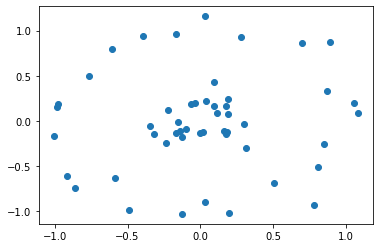

In [117]:
from sklearn.datasets import make_moons, make_circles, make_blobs

# criação do dataset
X, y = make_circles(n_samples=50, noise=0.1, random_state=199, factor=0.2)
plt.scatter(X[:, 0], X[:, 1])


Esse dataset possui uma não-linearidade, será que o KMeans consegue resolver essa região?

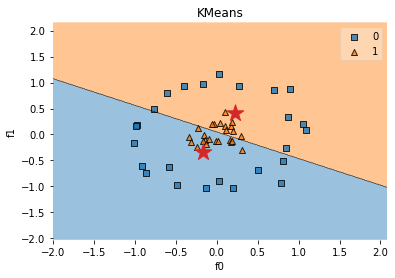

In [119]:
# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

model = KMeans(n_clusters=2)
model.fit(X)

show_decision_region(
    X,
    y,
    model,
    "f0",
    "f1",
    model.cluster_centers_
)

Aqui observamos que KMeans não consegue capturar grupamentos não lineares de forma eficiente. Observe que o para atribuir uma instância a um cluster, o KMeans utiliza distância euclidiana, portanto, criando regiões de separação lineares.